# Limb darkening correction

In [3]:
from module import readFitsBz2

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
import sunpy.sun
from sunpy.coordinates import frames


c:\Users\lherrington\anaconda3\envs\climso\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
hdu = readFitsBz2('data/L2/imoa_03933_l2_20240228_12402419_emi1.fts.bz2')

coord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime=hdu.header['DATE_OBS'],
                observer='earth', frame=frames.Helioprojective, )
    
header = sunpy.map.make_fitswcs_header(hdu.data, coord,
                                    reference_pixel=[hdu.header['CRPIX1'], hdu.header['CRPIX2']]*u.pixel,
                                    scale=[1.05,1.05]*u.arcsec/u.pixel,
                                    )

map = sunpy.map.Map(hdu.data, header)

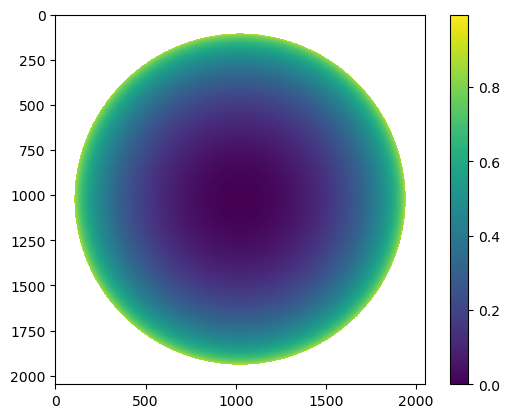

In [5]:
coordinates = sunpy.map.all_coordinates_from_map(map)
weights = coordinates.transform_to("heliocentric").z.value

weights = (weights / np.nanmax(weights)) ** 1

weights = np.ones(weights.shape) - weights

#weights[np.isnan(weights)] = 0

fig, ax = plt.subplots()
im = ax.imshow(weights)
fig.colorbar(im)

plt.show()

In [6]:
1024-923.6389702597819


100.3610297402181

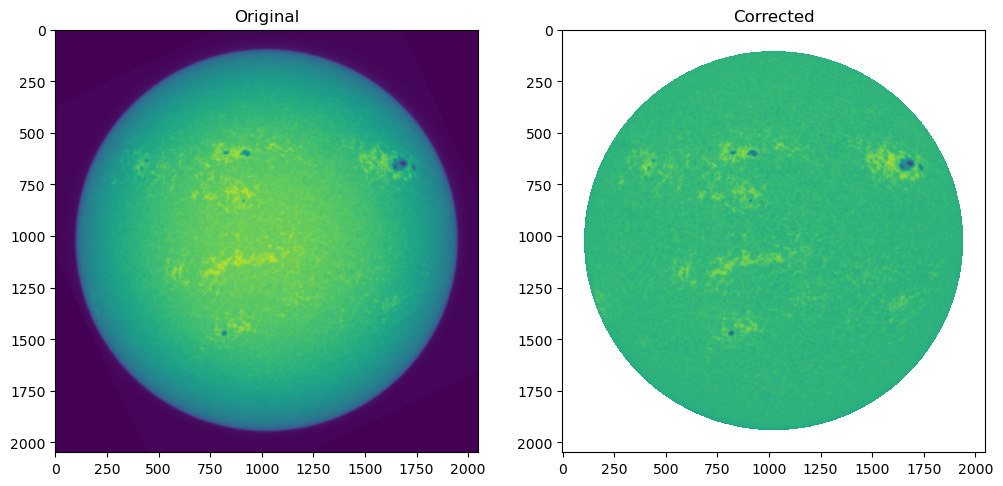

In [7]:
corrected = map.data + 0.5*np.max(map.data)*weights

plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(hdu.data)
plt.title('Original')
plt.subplot(122),plt.imshow(corrected)
plt.title('Corrected');

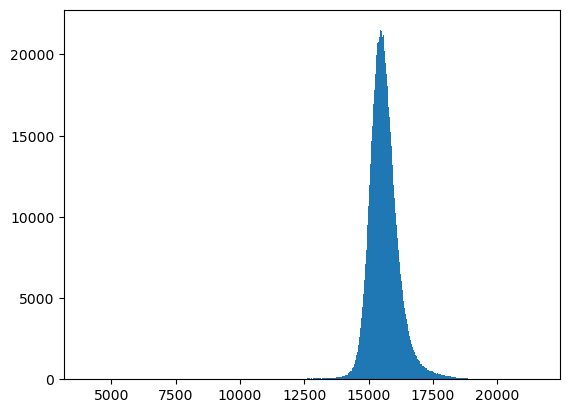

In [8]:
import matplotlib.pyplot as plt

plt.hist(corrected.flatten(), bins='auto');